# TP: Machine Learning

## TP1: Linear Regression (4h) 

### Introduction
La régression linéaire est une famille d’algorithmes d’apprentissage automatique visant à ajuster un
modèle linéaire à un ensemble de données. Les applications vont de la reconstruction de signaux à
la description empirique. L’ensemble de données considéré a été produit par l’Organisation mondiale
de la santé. Il regroupe l’évolution de 20 caractéristiques sur 15 ans et dans de nombreux pays. L’un
des objectifs de ce TP est de manipuler ce jeu de données et d’essayer de prédire l’évolution de
l’espérance de vie à travers différentes variables variables.

**Objectifs :**

 - Utiliser et configurer un environnement iPython.
 - Manipuler et visualiser un jeu des données reel.
 - Construire une régression linéaire simple ou multivariable.
 - Appliquer un modèle de régression linéaire sur un jeu des données reel.
 - Évaluer la qualité de l’ajustement d’un modèle de régression linéaire via R 2 .

Le notebook correspondant à ce TP est disponible sur Moodle. Répondez aux questions directement
sur ce notebook. Le notebook doit être remis avant la prochaine session. Le travail peut être fait en binôme.


## 1 : Utiliser et configurer un environnement iPython

**A faire 1.1**

Exécuter les cellules suivantes :

In [1]:
a = 3
b = 4
c = a + b

In [2]:
c = c

In [3]:
print(c)

7


In [4]:
c

7

**QUESTION 1**

Qu'est-ce qui déclenche l'affichage de la sortie ?

Si l'on ne stocke pas une données dans une variable, elle sera  affiché en sortie.

**A faire 1.2**

Exécutez les cellules suivantes :

In [5]:
import shutil
import pkgutil


def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [6]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
__future__                    | /usr/lib/python3.10
_aix_support                  | /usr/lib/python3.10
_bootsubprocess               | /usr/lib/python3.10
_collections_abc              | /usr/lib/python3.10
_compat_pickle                | /usr/lib/python3.10
_compression                  | /usr/lib/python3.10
_distutils_system_mod         | /usr/lib/python3.10
_markupbase                   | /usr/lib/python3.10
_osx_support                  | /usr/lib/python3.10
_py_abc                       | /usr/lib/python3.10
_pydecimal                    | /usr/lib/python3.10
_pyio                         | /usr/lib/python3.10
_sitebuiltins                 | /usr/lib/python3.10
_strptime                     | /usr/lib/python3.10
_sysconfigdata__li

**QUESTION 2**

Qu’est-ce qui est affiché sur la dernière sortie ?
Nous avons les packages téléchargés

Quelle est la version de Python utilisée ?
Nous avons la  version 3.10

Pour ce premier TP, vous aurez besoin de :
 - pandas
 - matplotlib
 - numpy
 - sklearn
Ces paquets sont-ils installés dans votre environnement ?

Ils font parties de la liste.

**A faire 1.3**

Exécutez la cellule suivante : 

In [104]:
import sklearn


**QUESTION 3**

Comment résoudriez-vous cette erreur ?
Nous devons installer la librairie pandas.

## 2 : Manipulation et visualisation des données


**A faire 2.1**

Exécutez les cellules suivantes :

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths                1649 non-null   int64  
 12  Polio                    

**QUESTION 4**

Pouvez-vous expliquer les différents éléments imprimés sur la dernière sortie ?

Nous obtenons les différentes colonnes et leurs types d'éléments qui y sont contenues.
s int = s entie
s float6=es réeles objec
objectn=es chaines de caractères  s objets.

In [9]:
df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)

df1:      Country  Year      Status  Life_expectancy  Adult_mortality  \
931  France  2014  Developing             82.2             79.0   
932  France  2013  Developing             82.0             81.0   
933  France  2012  Developing             81.5             83.0   
934  France  2011  Developing             81.7             83.0   

     Infant_deaths  Alcohol  Percentage_expenditure  Hepatitis_B  Measles  \
931              3     11.5             6739.677606         83.0      267   
932              3     11.1             6646.953935         74.0      272   
933              3     11.5              751.379355         78.0        0   
934              3     11.8              683.919057         74.0    14949   

     ...  Polio  Total_expenditure  Diphtheria  HIV_AIDS          GDP  \
931  ...   98.0              11.54        98.0       0.1  42955.24287   
932  ...   99.0              11.56        99.0       0.1  42554.12250   
933  ...   99.0              11.44        99.0       

**QUESTION 5**

Comment interpréter le nouveau DataFrame df1 par rapport à df ? Que représente df2 par rapport à df1 ?

df1 sélectionne les données concernant uniquement la France à partir de 2010

2 dfsélectionne les données concernant la France sur toutes les années car elle prend en compte tou l ka colonne 'Year'e.

**A coder 2.2**

Dans quel intervalle de valeurs évolue l'espérance de vie en Belgique entre 2004 et 2008

In [10]:
df3 = df[(df.Country == "Belgium") & ((df.Year > 2004) & (df.Year < 2008))] # filtrage des données en fonction des années
mindf3 = df3['Life_expectancy'].min()  # calcul la valeur min de la colonne Life_expectancy
maxdf3 = df3['Life_expectancy'].max()  # calcul la valeur max de la colonne Life_expectancy
print(mindf3, maxdf3) #affiche les valeurs min et max de la durée de vie

78.9 79.5


**A faire 2.3**

Calculer la corrélation entre toutes les caractéristiques


In [11]:
df.corr(numeric_only=True) 

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life_expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult_mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
Infant_deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
Percentage_expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis_B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
Under-five_deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


**QUESTION 6**

Quelles sont les valeurs les plus prometteuses et les moins prometteuses à utiliser pour prédire l'espérance de vie ?

La colonne 'Schooling' présente la corrélation la plus forte avec l'espérance de vie, tandis que la répartition des ressources et la mortalité des adultes sont également des données fortement corrélées.


**A coder 2.4**

Tracez l'espérance de vie par rapport à l'une des valeurs que vous avez choisies.

(Text(0.5, 1.0, 'Schooling Save People'),
 Text(0.5, 0, 'Schooling'),
 Text(0, 0.5, 'Life expectancy'))

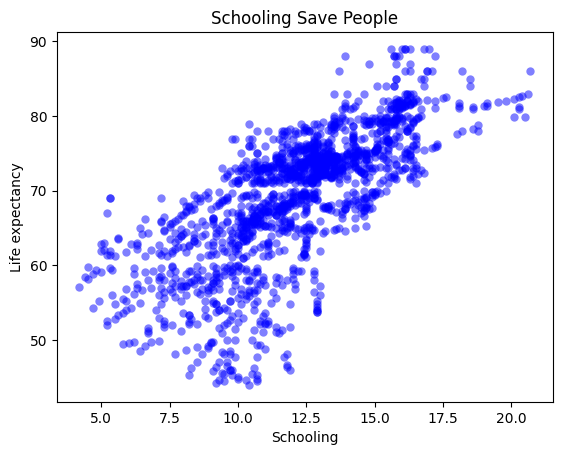

In [12]:
#grace à la librairie matplot et la fonction : matplotlib.pyplot.scatter
plt.scatter(df.Schooling, df.Life_expectancy, color = 'blue', alpha = 0.5, linewidths = 0)
plt.title('Schooling Save People'), plt.xlabel('Schooling'), plt.ylabel('Life expectancy')

## STEP 3: Simple Linear Regression

In [13]:
import numpy as np

**A coder 3.1**

Sélectionnez l'espérance de vie et la composition des revenus des ressources du Belarus, de Madagascar, de l'Inde et de la Lituanie. Ce nouveau cadre de données s'appellera df_study.

In [14]:
df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Belarus") | (df.Country == "Lithuania")]
df_study = df_study[['Life_expectancy', 'Income_composition_of_resources']]
df_study

,Life_expectancy,Income_composition_of_resources
225,72.0,0.796
226,71.7,0.796
227,71.9,0.793
228,72.0,0.787
229,73.0,0.780
230,70.0,0.771
231,70.0,0.755
232,69.8,0.739
233,68.9,0.723
234,68.1,0.713


**A coder 3.2**

Mettez en œuvre une fonction linéaire des moindres carrés et appliquez-la aux données sélectionnées précédemment.

In [15]:
#écart type / covariance
mean_x = df_study['Income_composition_of_resources'].mean() 
mean_y = df_study['Life_expectancy'].mean()

x_ecart = df_study['Income_composition_of_resources'] - mean_x
y_ecart = df_study['Life_expectancy'] - mean_y

cov = x_ecart*y_ecart
var = x_ecart**2

a = cov.sum()/var.sum() # coefficient directeur 
b = mean_y-a*mean_x # ordonné à l'origine

print("Coefficient de pente :", a)
print("Ordonnée à l'origine :", b)

# de la forme ax + b
y =  a * df_study.Income_composition_of_resources + b 

Coefficient de pente : 28.5982261406769
Ordonnée à l'origine : 49.34763518833232


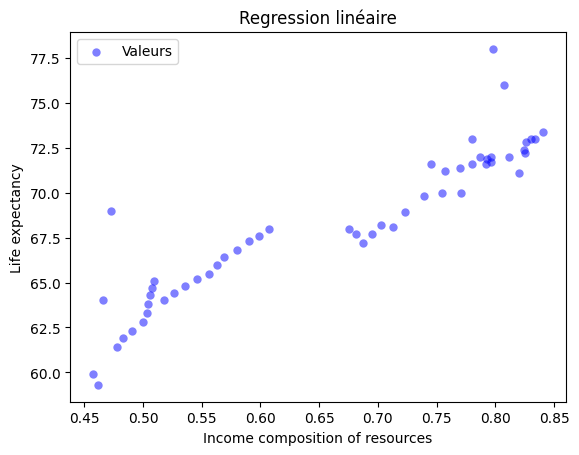

In [16]:
# Avec la question précédente, nous pouvons afficher le nuage de points
plt.scatter(df_study.Income_composition_of_resources, df_study.Life_expectancy, label='Valeurs', color = 'blue', alpha = 0.5, linewidths = 0)
plt.title('Regression linéaire'), plt.xlabel('Income composition of resources'), plt.ylabel('Life expectancy'), plt.legend()
plt.show()

**A coder 3.3**

Sur la même figure, tracez la ligne correspondant au résultat précédent et les points de données correspondant à df_study


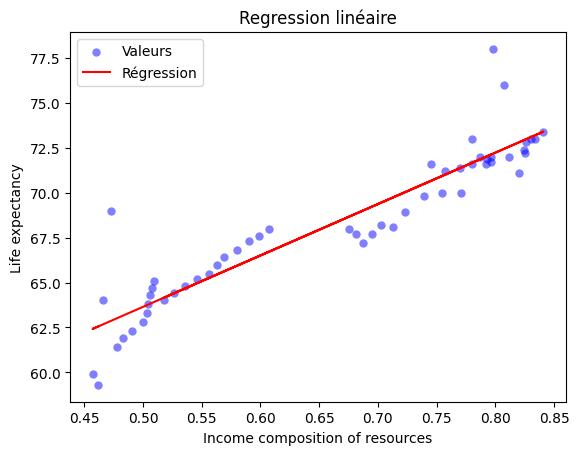

In [17]:

plt.scatter(df_study.Income_composition_of_resources, df_study.Life_expectancy, label='Valeurs', color = 'blue', alpha = 0.5, linewidths = 0)
plt.plot(df_study.Income_composition_of_resources, y, color = 'red', label='Régression')
plt.title('Regression linéaire'), plt.xlabel('Income composition of resources'), plt.ylabel('Life expectancy'), plt.legend()
plt.show()

**A coder 3.4**

Maintenant, implémentez une fonction de descente de gradient `def gradDescent(x, y, theta, alpha, iters)` où `x` correspond aux covariables, `y` la valeur cible, `theta` les poids initiaux, `alpha` le taux d'apprentissage et `iters` le nombre d'itérations de descente de gradient. 

Pour rappel, la descente de gradient est un algorithme d'optimisation de recherche d'un minimum local au sein d'une fonction differentiable. Il s'agit d'un algorithme iteratif qui cherche à trouver les `w` qui minimisent notre fonction objectif. Étant donné que l'on cherche à minimiser l'erreur quadratique, on cherche à minimiser la fonction : $L(y, \hat{y})=\sum\limits_{i=1}^n (y_i - w_1x_i-w_0)^2 $


Étant donné que la fonction précédente est convexe, sa dérivée en chaque point nous indique la direction **opposée** du minimum. Ainsi, l'idée est de mettre à jour chaque poids d'une petite proportion ($\alpha$) de cette direction : $w_i^{t+1} = w_i^t - \alpha \frac{d(L(y, \hat{y}))}{d(w_i)}$

Attention : ici, on cherche à mettre à jour 2 poids, w_0 et w_1, on doit donc calculer les 2 dérivées partielles. Faites également attention au fait que la dérivée est calculée selon les $w_i$. Enfin, une fois tout cela remarqué, le calcul de la dérivée est finalement assez simple.


In [18]:
def gradDescent_a(x, y, theta, alpha, iters): 
    # pour déterminer l'écart, nous devons soustraire x à sa valeur moyenne 
    x_ecart = x - x.mean() 
    y_ecart = y - y.mean()

    covariance = (x_ecart*y_ecart).sum()
    variance = (x_ecart**2).sum()

    for i in range(iters):
        gSSE = 2*covariance - 2*variance*theta
        theta = theta + alpha * gSSE
    return theta

**TO CODE 3.5**

Calculer la descente du gradient sur df\_study pour 1000 itérations avec différentes valeurs de alpha. Vous pouvez initialiser `theta` avec `theta_0 = 0` et `theta_1 = 1`.

In [19]:
gradDescent_a(df_study.Income_composition_of_resources, df_study.Life_expectancy, 0, 1, 1000)

28.59822614067687

**TO CODE 3.6**

Sur la même figure, tracez l'évolution de `theta_0` à travers les itérations pour chaque valeur différente d'alpha que vous avez choisie. Faites la même chose pour `theta_1`.

(Text(0.5, 1.0, 'Approx w1'),
 Text(0.5, 0, 'Itérations'),
 Text(0, 0.5, 'w1'),
 <matplotlib.legend.Legend at 0x7fabe5e585b0>)

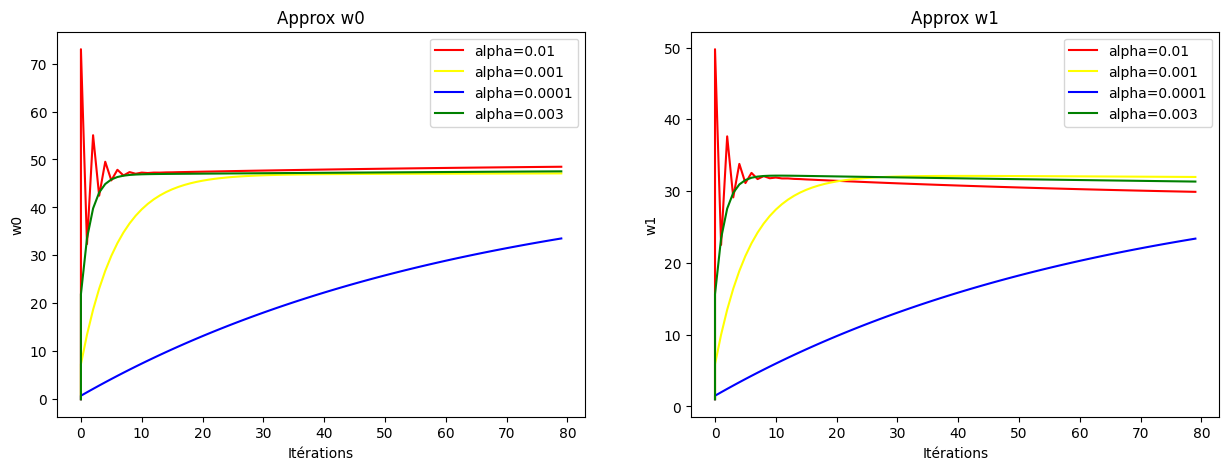

In [20]:
def gradDescentPlot(x, y, theta, alpha, iters): #theta est un tableau contenant a et b initiaux
    x_2 = (x*x).sum()
    x_y = (x*y).sum()
    x_ = x.sum()
    y_ = y.sum()

    l = len(x)
    PlotThet0 = [theta[0]]
    PlotThet1 = [theta[1]]
    iteration = [0]

    for i in range(iters):
        n_theta0 = theta[0] + 2*alpha*(y_ - theta[1]*x_ - theta[0]*l)
        n_theta1 = theta[1] + 2*alpha*(x_y - theta[1]*x_2 - theta[0]*x_)
        
        theta[0] = n_theta0
        theta[1] = n_theta1

        PlotThet0.append(n_theta0)
        PlotThet1.append(n_theta1)
        iteration.append(i)
    return(PlotThet0, PlotThet1, iteration)


(PT0_1, PT1_1, ite_1) = gradDescentPlot(df_study.Income_composition_of_resources, df_study.Life_expectancy, [0, 1], 0.01, 80)
(PT0_2, PT1_2, ite_2) = gradDescentPlot(df_study.Income_composition_of_resources, df_study.Life_expectancy, [0, 1], 0.001, 80)
(PT0_3, PT1_3, ite_3) = gradDescentPlot(df_study.Income_composition_of_resources, df_study.Life_expectancy, [0, 1], 0.0001, 80)
(PT0_4, PT1_4, ite_4) = gradDescentPlot(df_study.Income_composition_of_resources, df_study.Life_expectancy, [0, 1], 0.003, 80)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(ite_1, PT0_1, color = 'red', label='alpha=0.01')
plt.plot(ite_2, PT0_2, color = 'yellow', label='alpha=0.001')
plt.plot(ite_3, PT0_3, color = 'blue', label='alpha=0.0001')
plt.plot(ite_4, PT0_4, color = 'green', label='alpha=0.003')

plt.title('Approx w0'), plt.xlabel('Itérations'), plt.ylabel('w0'), plt.legend()

plt.subplot(122)
plt.plot(ite_1, PT1_1, color = 'red', label='alpha=0.01')
plt.plot(ite_2, PT1_2, color = 'yellow', label='alpha=0.001')
plt.plot(ite_3, PT1_3, color = 'blue', label='alpha=0.0001')
plt.plot(ite_4, PT1_4, color = 'green', label='alpha=0.003')

plt.title('Approx w1'), plt.xlabel('Itérations'), plt.ylabel('w1'), plt.legend()

**Question 7**

Discutez du rôle d'alpha.

$\alpha$ symbole la  la vitesse à laquelle la fonction se stabilise (solution optimale).

**A coder 3.7**

Calculez le score $R^2$ pour la régression sur df_étude. Vous pouvez trouver une fonction sklearn [ici](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [21]:
from sklearn.metrics import r2_score

In [22]:
R2 = r2_score(df_study['Life_expectancy'], y)
print(R2)

0.846632270152281


**QUESTION 8**

La régression linéaire est-elle appropriée entre les deux variables sélectionnées ?

Le coefficient ne correspond pas à une droite ( coeff acceptable > 0.98). Cependant pour de vrai données et avec une assez forte dispersion, le coefficient est correcte.

**QUESTION 9**

Si ce n'est pas le cas, quelle serait la régression pertinente entre ces deux variables ?

Etant donné que la courbe n'est pas une droite, nous pourrions utiliser une régression polynomiale.

## STEP 4: Visualisation du diagnostique

**TO CODE 4.1**

Calculez les résidus et afficher les residus vs les valeurs predites.

(Text(0.5, 1.0, 'Résidus du modèle'),
 Text(0.5, 0, 'Income composition of resources'),
 Text(0, 0.5, 'Résidus de Life expectancy'),
 <matplotlib.legend.Legend at 0x7fab3cab9fc0>)

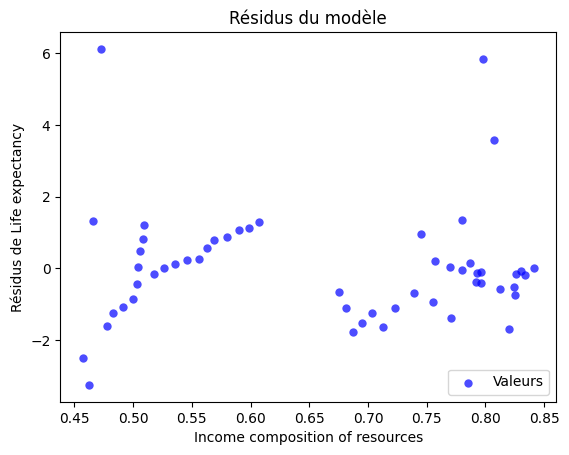

In [36]:
# écart de la valeur observé et la valeur prédite
residus = df_study['Life_expectancy'] - (a*df_study['Income_composition_of_resources'] + b)
plt.scatter(df_study['Income_composition_of_resources'], residus, label='Valeurs', color = 'blue', alpha = 0.7, linewidths = 0)
plt.title('Résidus du modèle'), plt.xlabel('Income composition of resources'), plt.ylabel('Résidus de Life expectancy'), plt.legend()

**Question 10**

Que concluez vous de cet affichage ?
Nous observons que la majorité des points ont une erreur résiduelle à environ 3%. Cependant on note la présence de quelques points qui ont une erreur résiduelle d'environ 10%, ce qui n'est pas négligeable. 
Malgré tout cela reste acceptable pour des valeurs réelles mais pas assez précises pour des études poussées.  

**TO CODE 4.2**

Calculez également le Scale Location plot


(Text(0.5, 1.0, 'Scale Location plot'),
 Text(0.5, 0, 'Income composition of resources'),
 Text(0, 0.5, ' racine des résidus'))

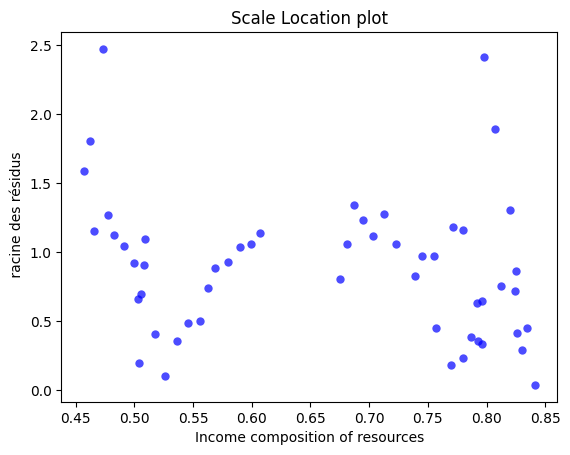

In [39]:
# Scale Location Plot permet de montre la répatitions équitables des résidus autour de notre regression linéaire
scaloc = np.sqrt(np.abs(residus))
plt.scatter(df_study['Income_composition_of_resources'], scaloc, color = 'blue', alpha = 0.7, linewidths = 0)
plt.title('Scale Location plot'), plt.xlabel('Income composition of resources'), plt.ylabel(' Racine des résidus')

**Question 11**

Que concluez vous de cet affichage ?

Ca permet de visualiser la distance entre la regression linéaire et les résidus. Nous pouvons approximer une distance entre 0 et 1 avec quelques exceptions supérieur à 1.5 
Nous pouvons,alors, modéliser la zone de fonctionnement du modele

**TO CODE 4.3**

Compute now the Cook's distance for our data. You can compute it by yourself of use any library you can find.


(Text(0.5, 1.0, 'Distance de cook'),
 Text(0.5, 0, 'Income composition of resources'),
 Text(0, 0.5, " cook's distance"))

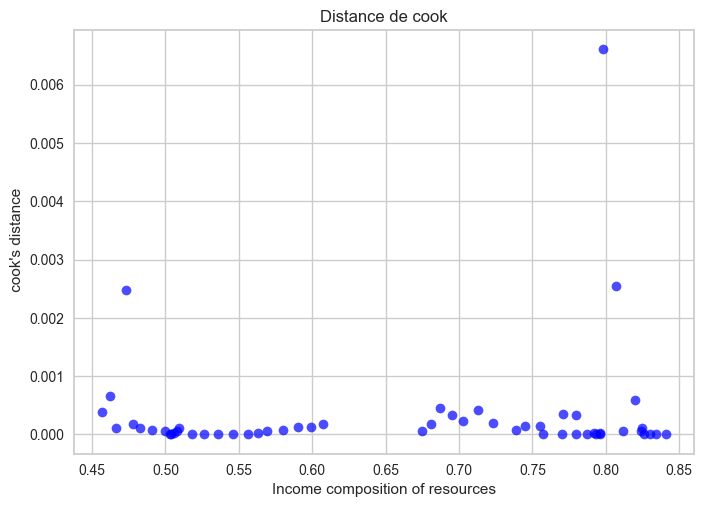

In [85]:
import numpy as np

#Nous avons décidé d'utiliser le calcul des distances de cook à la main car aucune librairie ne fonctionnaient. 

# On convertit 'Income_composition_of_resources' vers un vecteur colonne
A = df_study['Income_composition_of_resources'].values.reshape(-1, 1)

# On le transpose pour avoir un vecteur ligne
T = A.T

# On calcule la matrice de leverage qu'on appellera H
H = A @ np.linalg.pinv(T @ A) @ T
# On la diagonalise
h_ii = np.diag(H)

# Ensuite on calcule le Mean Squared Error (MSE)
MSE = np.mean(residus**2)

# Puis la distance de cook pour chaque observation
p = 54  # Le nombres de coefficients
cooks_d = (residus**2 / (p * MSE)) * (h_ii / (1 - h_ii)**2)

plt.scatter(df_study['Income_composition_of_resources'], cooks_d, color = 'blue', alpha = 0.7, linewidths = 0)
plt.title('Distance de cook'), plt.xlabel('Income composition of resources'), plt.ylabel(' cook\'s distance')


**Question 12**

Que concluez vous de cet affichage ?

Le CooksDistancevisualiseur affiche un diagramme en batons de toutes les instances par index et leur score de distance associé, ainsi qu'un seuil heuristique pour montrer rapidement quel pourcentage de l'ensemble de données peut avoir un impact sur le modèle de régression.

**TO DO 4.1** 

On souhaite désormais ajouter plusieurs variable à notre problème de régression. Exécutez la cellule suivante pour prendre en compte différente variable dans notre modèle.


In [86]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

**TO CODE 4.4**

Traiter de trop nombreuses variables peut parfois être contre-producttif, et il peut être intéressant de retirer certaines caractéristiques. Une manière d'évaluer l'importante de chaque variable est de calculer le `f_test`, nommée f_regression avec sklearn. 



In [101]:
from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(X , y)
df = pd.DataFrame({
    'Feature' : [f'Feature {i}'for i in range(X.shape[1])],
     'F-value' : f_values,
     'p-value' : p_values
     })
df

,Feature,F-value,p-value
0,Feature 0,3.864442,5.466967e-02
1,Feature 1,125.092813,1.891968e-15
2,Feature 2,36.729420,1.545113e-07
3,Feature 3,287.054376,8.047139e-23
4,Feature 4,261.508960,6.212050e-22
5,Feature 5,106.622723,3.395111e-14


**QUESTION 13**

En fonction du résultat du f_test, triez chaque variable de la moins interessante à la plus intéressante. Comparez ce résultat avec la correlation de votre sous-ensemble.

In [103]:
sorted_indices = np.argsort(f_values)[::-1]
di = pd.DataFrame({
    'Feature' : [f'Feature {i}'for i in sorted_indices],
     'F-value' : sorted_indices[i],
     'p-value' : p_values
     })
di

NameError: name 'i' is not defined

f_values : Une valeur plus élevée suggère que la caractéristique est plus "utile" ou "pertinente" pour expliquer la variance dans la variable cible, par rapport à un modèle sans cette caractéristique.

p_values : Une valeur faible (typiquement inférieure à 0,05) suggère que l'effet de la caractéristique sur la variable cible est statistiquement significatif. Aalors on rejette l'hypothèse nulle que la caractéristique n'a pas d'effet sur la variable cible

Dans notre cas la Feature 3 est  la plus interessante .